In [42]:
from astropy.io import fits
import matplotlib.pyplot as plt
from desispec.io.spectra import read_spectra
import numpy as np
from desitarget.targetmask import desi_mask
# Load the coadded spectra
spec = read_spectra("coadd-main-dark-0.fits")

# Inspect the available arms (b, r, z)
print("Arms available:", spec.wave.keys())  # usually: 'b', 'r', 'z'

# Let's choose one arm to plot (e.g. 'r' = red)
arm = 'z'
print(spec.flux[arm].shape)  # shape of the flux array
print(spec.ivar[arm].shape)  # shape of the ivar array
print(spec.wave[arm].shape)  # shape of the mask array
fibermap = spec.fibermap

# Boolean mask for QSOs
is_qso = (fibermap['DESI_TARGET'] & desi_mask.QSO) != 0

# Print how many QSOs are in the file
# print(f"Number of QSOs: {is_qso.sum()}")
# print(fibermap)

INFO:spectra.py:451:read_spectra: iotime 0.406 sec to read spectra from:  coadd-main-dark-0.fits at 2025-05-08T22:50:24.154623
Arms available: dict_keys(['b', 'r', 'z'])
(1704, 2881)
(1704, 2881)
(2881,)


In [43]:
hdul = fits.open("QSO_cat_iron_cumulative_v0.fits")
data=hdul[1].data
Z = data['Z']
TARGETID_QSO_CAT = data['TARGETID']

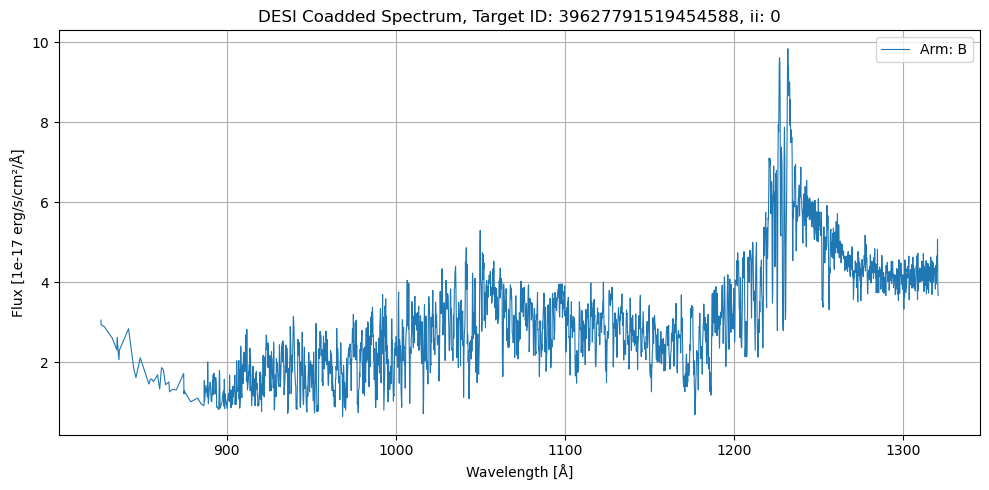

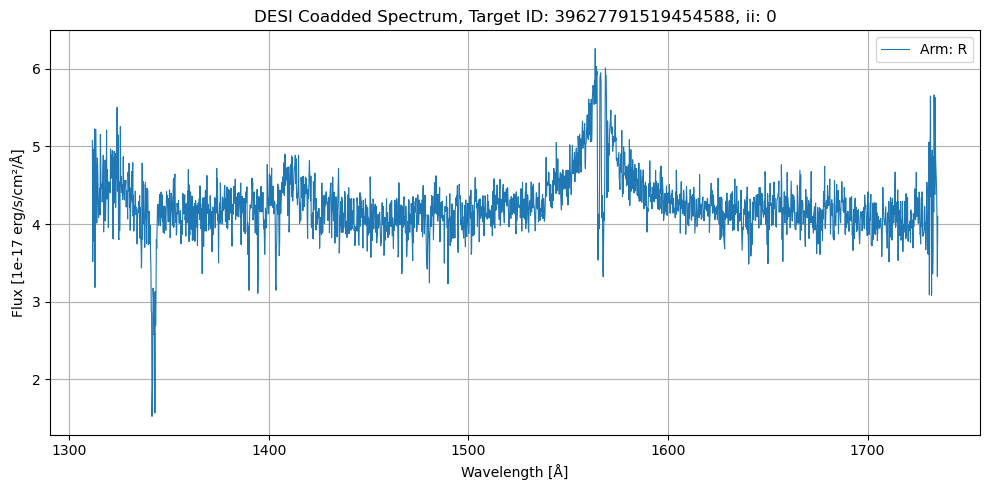

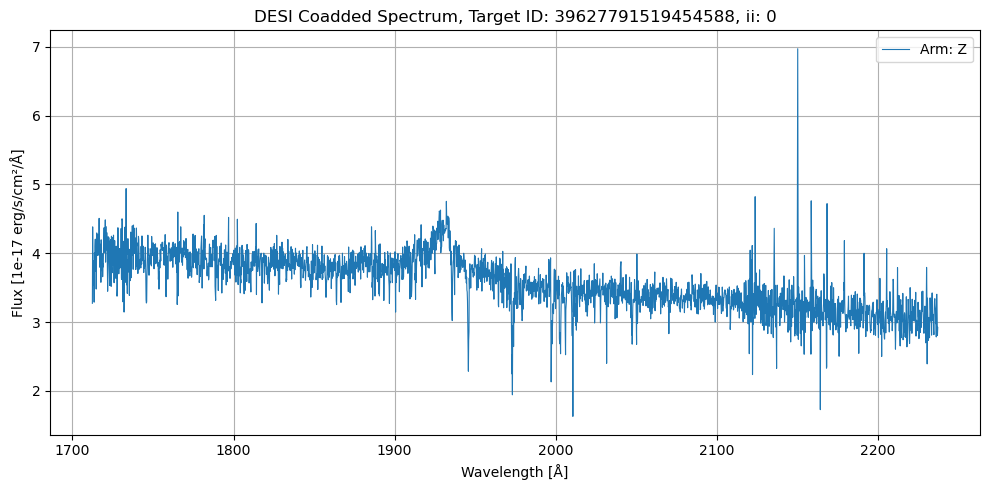

/home/reza/anaconda3/envs/desi/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/reza/anaconda3/envs/desi/lib/python3.10/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


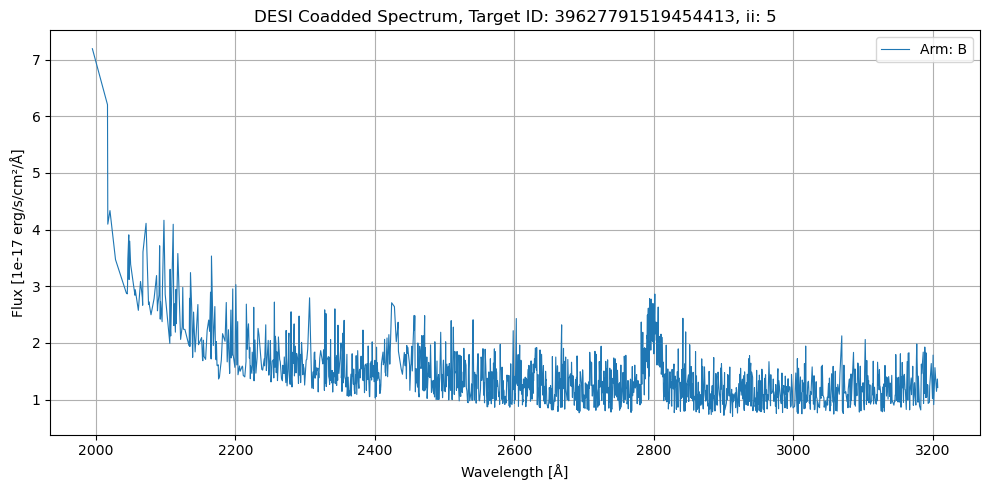

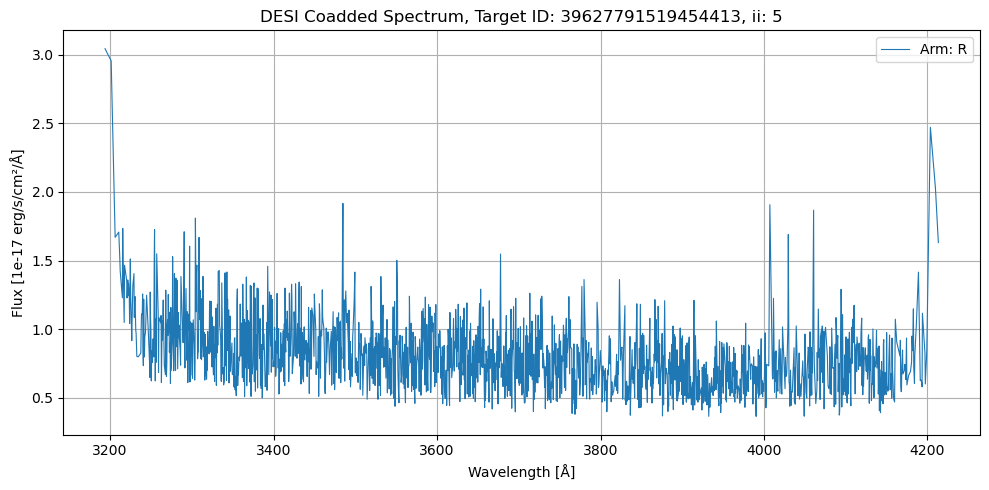

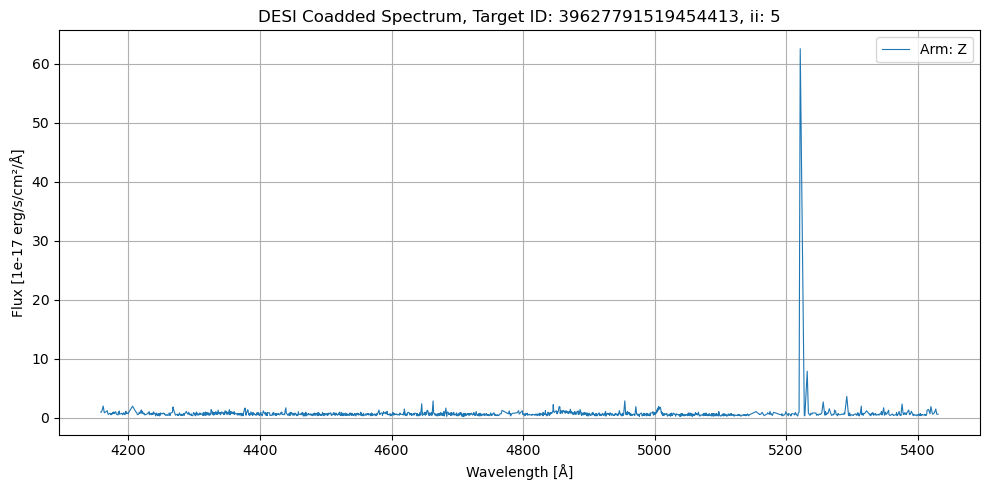

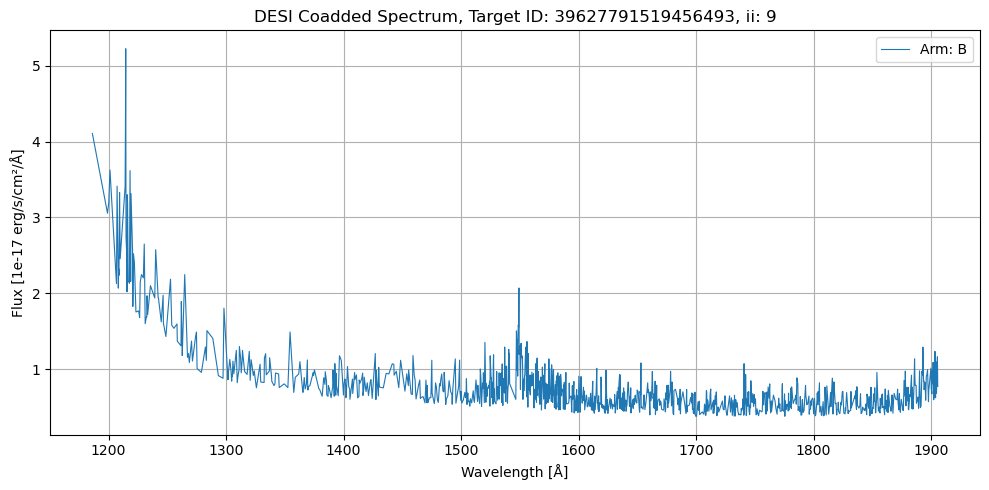

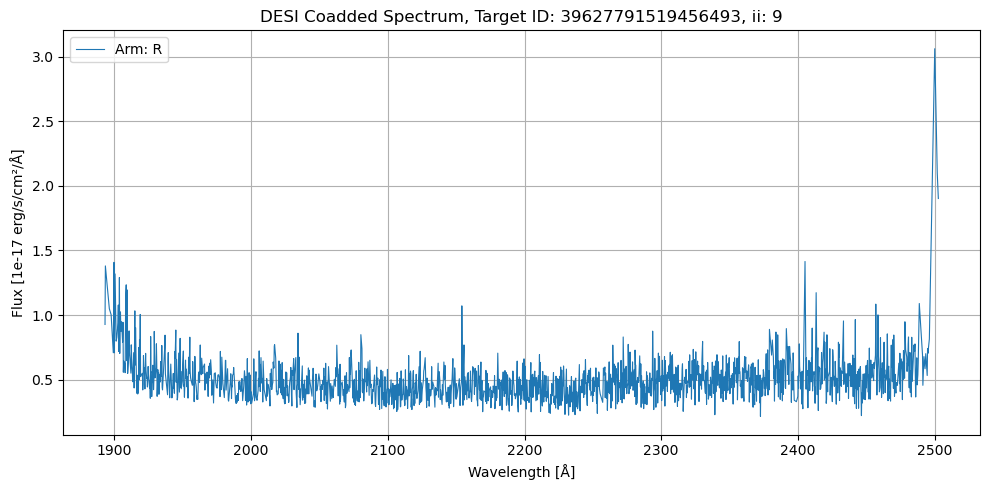

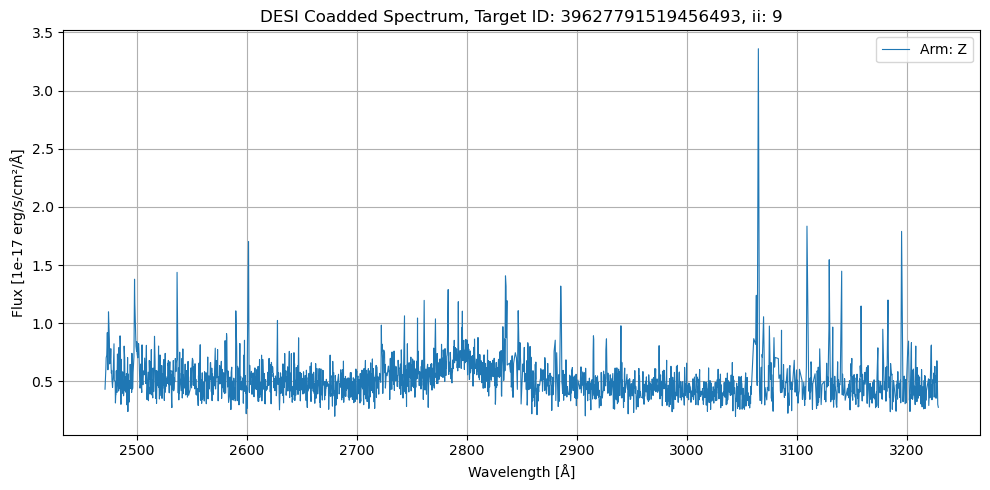

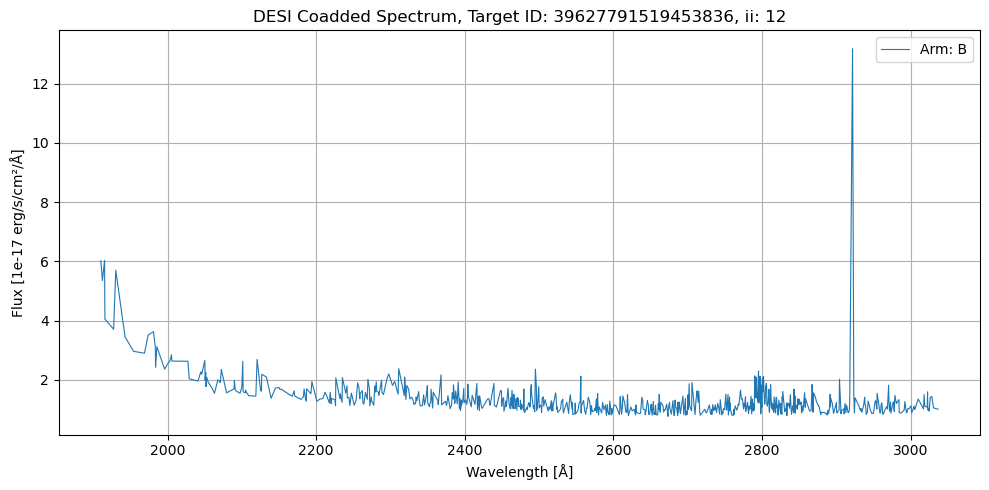

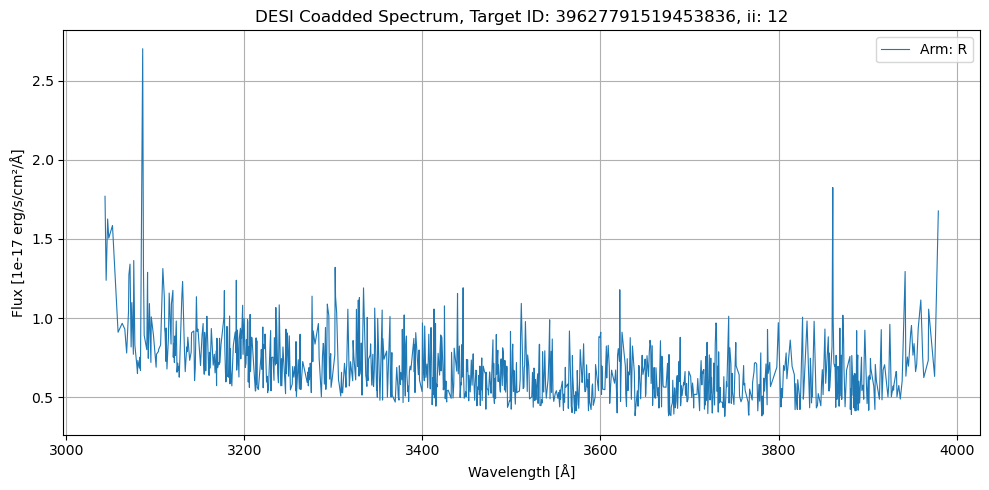

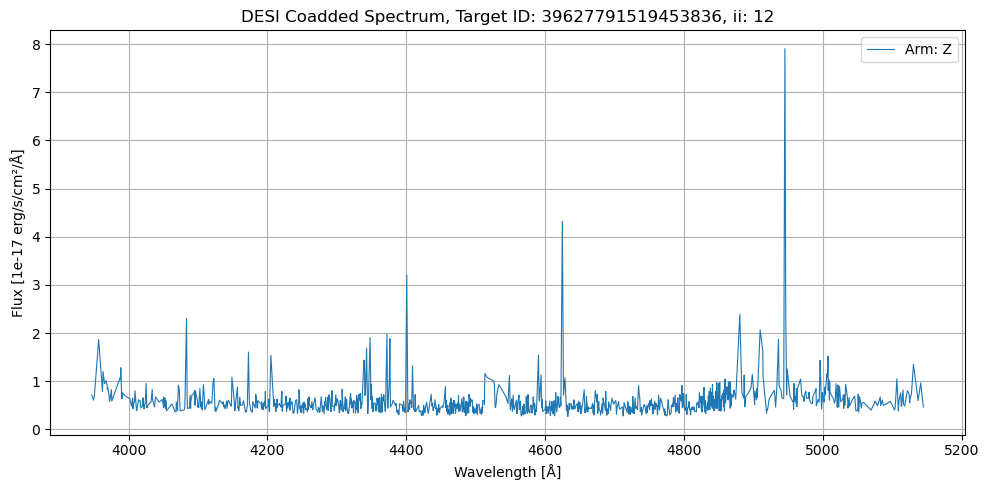

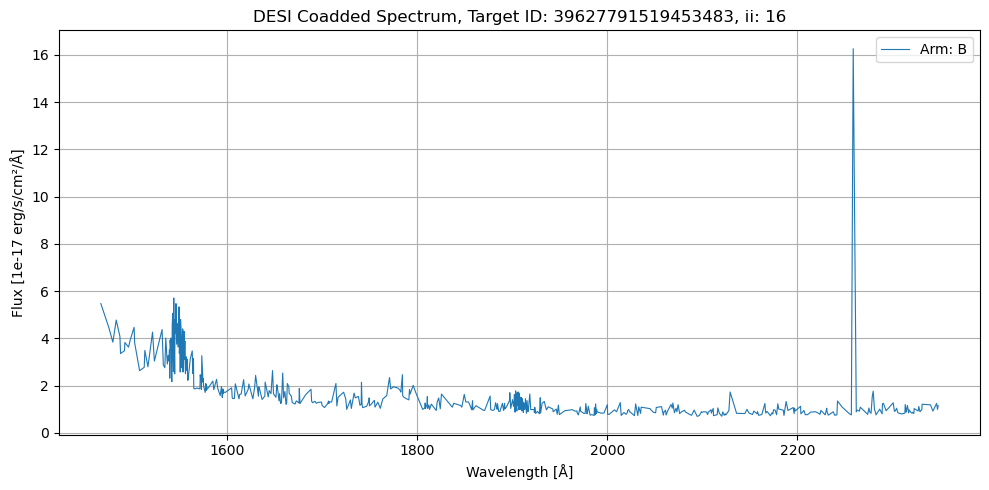

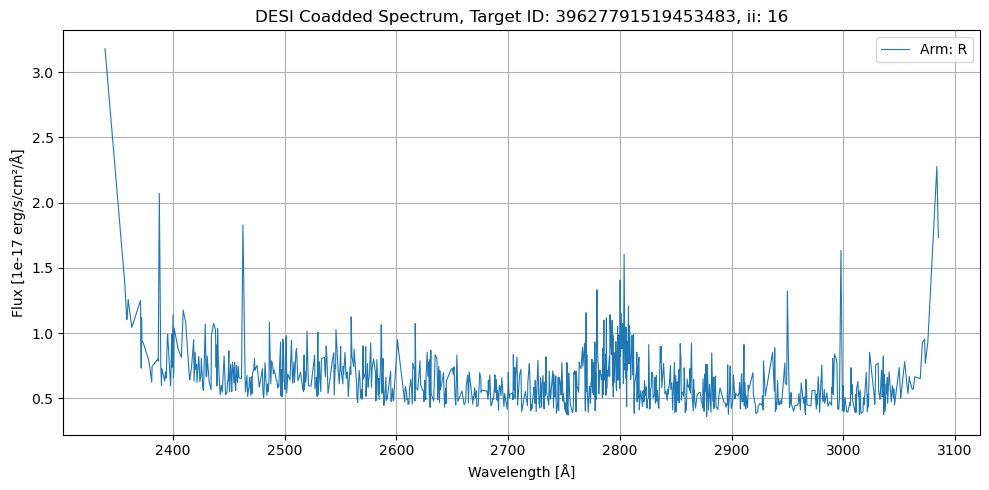

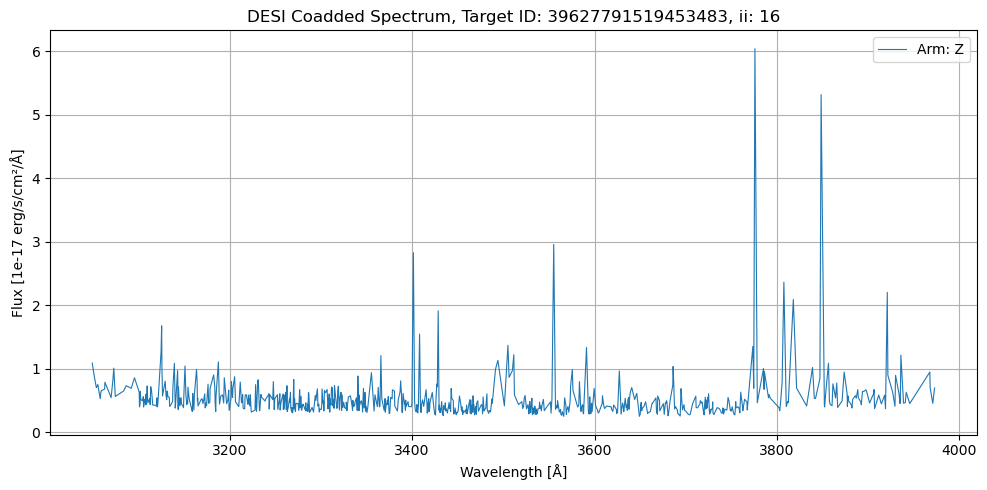

In [73]:
for ii in range(20): #range(len(fibermap)):
    thisZ = np.mean(Z[TARGETID_QSO_CAT== fibermap['TARGETID'][ii]])
    if thisZ>0.0:
        for arm in ['b', 'r', 'z']:
            
            # Pick the first target in the spectra (index 0)
            flux = spec.flux[arm][ii]
            wave = spec.wave[arm]/(1+thisZ)
            ivar = spec.ivar[arm][ii]  # Inverse variance

            # Optional: mask bad pixels using the inverse variance
            good = flux*np.sqrt(ivar)>2
            wave = wave[good]
            flux = flux[good]

            # Plot the spectrum
            plt.figure(figsize=(10, 5))
            plt.plot(wave, flux, label=f'Arm: {arm.upper()}', lw=0.8)
            plt.xlabel("Wavelength [Å]")
            plt.ylabel("Flux [1e-17 erg/s/cm²/Å]")
            plt.title("DESI Coadded Spectrum, Target ID: {}, ii: {}".format(fibermap['TARGETID'][ii], ii))
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
        